In [6]:
import matplotlib.pyplot as plt
import mrcfile
import numpy as np
import torch

from torch_fourier_filter.whitening import power_spectral_density, whitening_filter

In [3]:
img_path = "/some/path/to/image.mrc"
img = mrcfile.open(img_path).data.copy()
img = torch.tensor(img, dtype=torch.float32)
img.shape

torch.Size([4096, 4096])

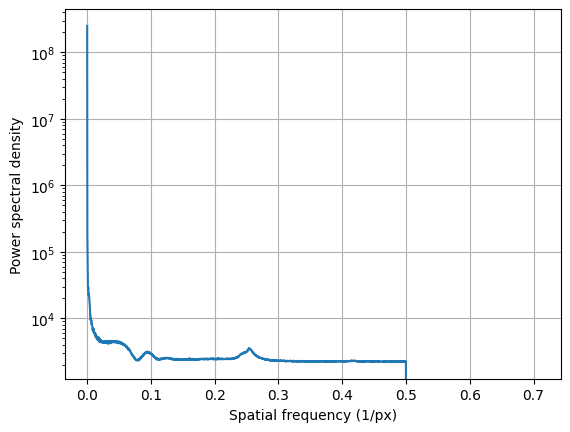

In [19]:
img_dft = torch.fft.fftn(img)
img_dft = torch.fft.fftshift(img_dft)

psd1d = power_spectral_density(
    img_dft,
    rfft=False,
    fftshift=True,
    dim=(-2, -1),
    num_freq_bins=3000,
    max_freq=0.5,  # in terms of Nyquist frequency
)

x = torch.linspace(0, np.sqrt(2) / 2, psd1d.shape[-1])
plt.plot(x, psd1d)
plt.yscale("log")
plt.xlabel("Spatial frequency (1/px)")
plt.ylabel("Power spectral density")
plt.grid()
plt.show()

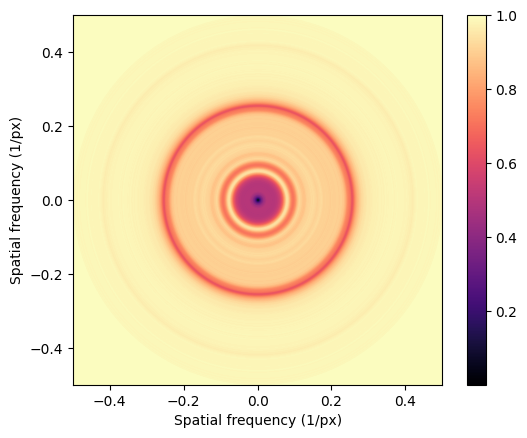

In [23]:
wf = whitening_filter(
    img_dft,
    rfft=False,
    fftshift=True,
    dim=(-2, -1),
    num_freq_bins=3000,
    max_freq=0.5,  # in terms of Nyquist frequency
)

extent = [-0.5, 0.5, -0.5, 0.5]
plt.imshow(wf, extent=extent, cmap="magma")
plt.xlabel("Spatial frequency (1/px)")
plt.ylabel("Spatial frequency (1/px)")
plt.colorbar()
plt.show()